In [144]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
from collections import namedtuple, defaultdict
from paper_sims_util import MCC
from running_wrappers import get_loaders
import matplotlib.pyplot as plt
%matplotlib inline
LOADERS = get_loaders()
AlgoParams = namedtuple('AlgoParams', 'stability_samples M pi')
GraphParams = namedtuple('GraphParams', 'N eta p d ratios')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
run_name = 'server_p_50'
run_ids = range(5)
with open("{}_algo_params.pkl".format(run_name), 'rb') as f:
    algo_params = pickle.load(f)
with open("{}_graph_params_dict.pkl".format(run_name), 'rb') as f:
    graph_params_dict = pickle.load(f)
graph_params_dict = {
    'chain': GraphParams(p=20, N=[20, 25, 30, 35, 40], eta=1, ratios=None, d=None), #p, N, eta
    'star': GraphParams(p=20, d=[10, 15, 20, 25, 30], N=50, eta=1, ratios=None), #p, d, N, eta
    'random': GraphParams(p=20, d=0.01, ratios=[r/500. for r in [300, 375, 500, 750, 1000]], eta=1, N=None), #p, d, ratio over 500, eta
    'grid_3D': GraphParams(p=2, ratios=[r/524. for r in [200, 250, 300, 400, 500]], eta=2, N=None, d=None), #p, ratio over 524, eta
    'grid': GraphParams(p=3, ratios=[r/529. for r in [75, 100, 150, 200, 250]], eta=2, N=None, d=None) #p, ratio over 529, eta
}

In [211]:
def get_points(loaded_data):
    points = defaultdict(lambda: defaultdict(list))
    for x_label, trials in loaded_data.items(): #x_;
        #print(x_label)
        for trial in trials:
            #print(type(trial))
#             if type(trial) != dict:
#                 continue
            #print(x_label)
            #print(trials.keys())
            omega = trial[0]
            #print(np.sum(omega))
            results = trial[1]
            for algo_name, algo_results in results.items():
                omega_hat = algo_results[0]
                #print(algo_name, np.sum(omega_hat))
                algo_mcc = MCC(omega_hat, omega)
                points[algo_name][x_label].append(algo_mcc)
    return points

In [212]:
def plot_lines(d):
    lines = defaultdict(list)
    x_labels = list(next(iter(d.values())).keys())
    for algo_name, x_label_to_trials in d.items():
        for x_label in x_labels:
            trial_MCCs = x_label_to_trials[x_label]
            lines[algo_name].append(np.mean(trial_MCCs))
    return x_labels, lines

In [215]:
def plot(graph_type, ret = False):
    loaded_data = LOADERS[graph_type](graph_params_dict[graph_type], 
                                  algo_params, 
                                  run_name,
                                  run_ids)
    points = get_points(loaded_data)
    lines = plot_lines(points)
    if ret:
        return points, lines
    for algo, line in lines[1].items():
        plt.plot(lines[0], line, label=algo)
    plt.title(graph_type)
    plt.legend()
    plt.show()

In [216]:
points, lines = plot('chain', True)

In [221]:
for algo_name in points.keys():
    print(algo_name, points[algo_name][20])

our [0.565113033911304, 0.6211635674368259, 0.5411640370057028, 0.5741369145835993, 0.5811222395904888]
SH [0.507371404963127, 0.507371404963127, 0.507371404963127, 0.5635759629410776, 0.8701091545767558]
glasso [0.20559126726745028, 0, 0, 0, 0.2263415711322427]
nbsel [0.7401480444148052, 0.7726675087665417, 0.7363271925923222, 0.7651530459153054, 0.7516527450643941]
anand [0.4257026044359851, 0.42456286129194787, 0.42916362372550115, 0.43507597159094746, 0.4146043803310322]


In [218]:
print(points.items())

dict_items([('our', defaultdict(<class 'list'>, {20: [0.565113033911304, 0.6211635674368259, 0.5411640370057028, 0.5741369145835993, 0.5811222395904888], 25: [0.6211635674368259, 0.7537816486368989, 0.6941843629819073, 0.7098024378159417, 0.7083447986079611], 30: [0.8284846898236939, 0.7222780017996234, 0.8189905008988283, 0.7564007550942542, 0.868106872306132], 35: [0.9008263325926453, 0.8063129956636504, 0.8421519969649717, 0.865313493031115, 0.7564007550942542], 40: [0.9232126728658223, 0.8772893772893773, 0.8891251620689622, 0.868106872306132, 0.9232126728658223]})), ('SH', defaultdict(<class 'list'>, {20: [0.507371404963127, 0.507371404963127, 0.507371404963127, 0.5635759629410776, 0.8701091545767558], 25: [0.876630989471527, 0.14002800840280097, 0.3713906763541037, 0.956689206214921, 0.4221692472768631], 30: [0.39814814814814814, 0.15845137300395226, 0.15845137300395226, 0.4214636152117623, 0.9099649495575094], 35: [0.9793622040886536, 0.4221692472768631, 0.9787414965986394, 0.96

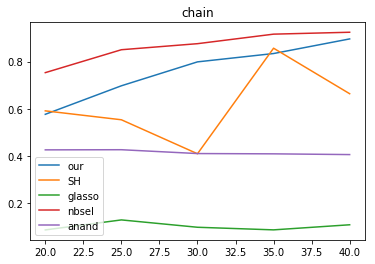

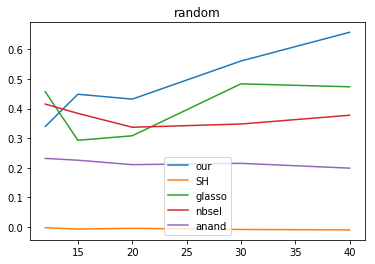

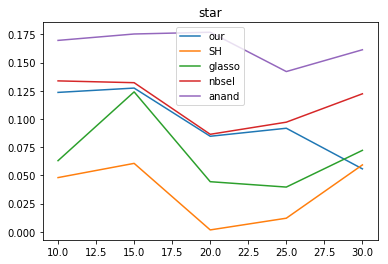

In [214]:
for graph_type in ['chain', 'random', 'star']:
    plot(graph_type)